In [2]:
import warnings
!pip install pmdarima
!pip install statsmodels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00


In [3]:
df = pd.read_csv(r'/content/BTC-01.csv', parse_dates = True)

In [4]:
df.head(10)

,Date,Open,High,Low,Close
0,01-01-2019,3746.713379,3850.913818,3707.231201,3843.520020
1,02-01-2019,3849.216309,3947.981201,3817.409424,3943.409424
2,03-01-2019,3931.048584,3935.685059,3826.222900,3836.741211
3,04-01-2019,3832.040039,3865.934570,3783.853760,3857.717529
4,05-01-2019,3851.973877,3904.903076,3836.900146,3845.194580
5,06-01-2019,3836.519043,4093.297363,3826.513184,4076.632568
6,07-01-2019,4078.584961,4092.613525,4020.894043,4025.248291
7,08-01-2019,4028.472168,4109.020996,3996.955322,4030.847900
8,09-01-2019,4031.552002,4068.403564,4022.662842,4035.296387
9,10-01-2019,4034.411377,4064.066650,3659.174561,3678.924561


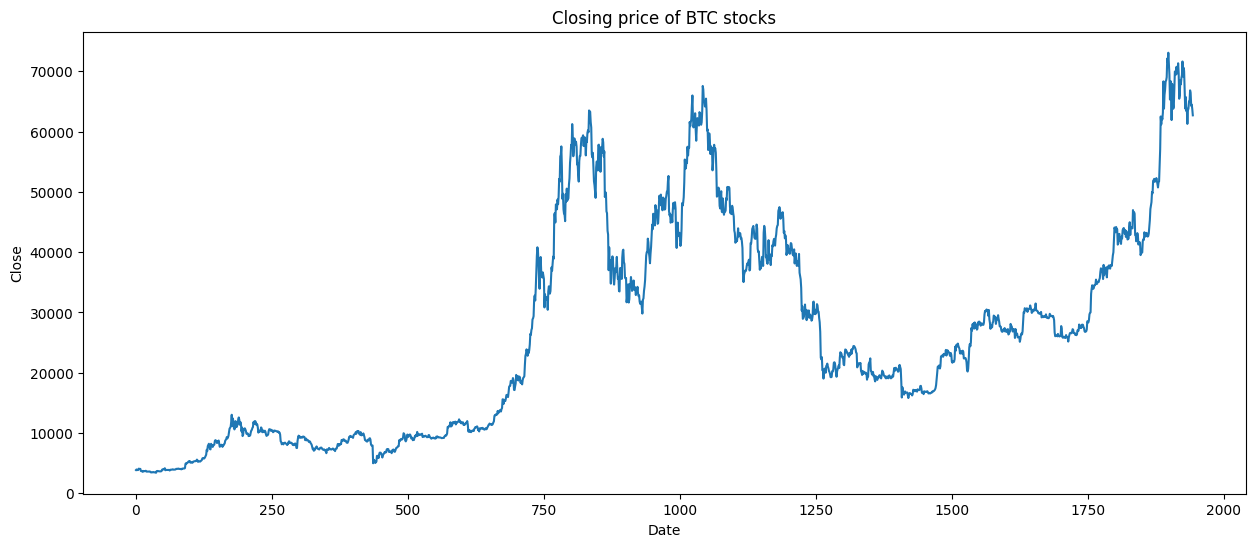

In [6]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of BTC stocks")
plt.show()

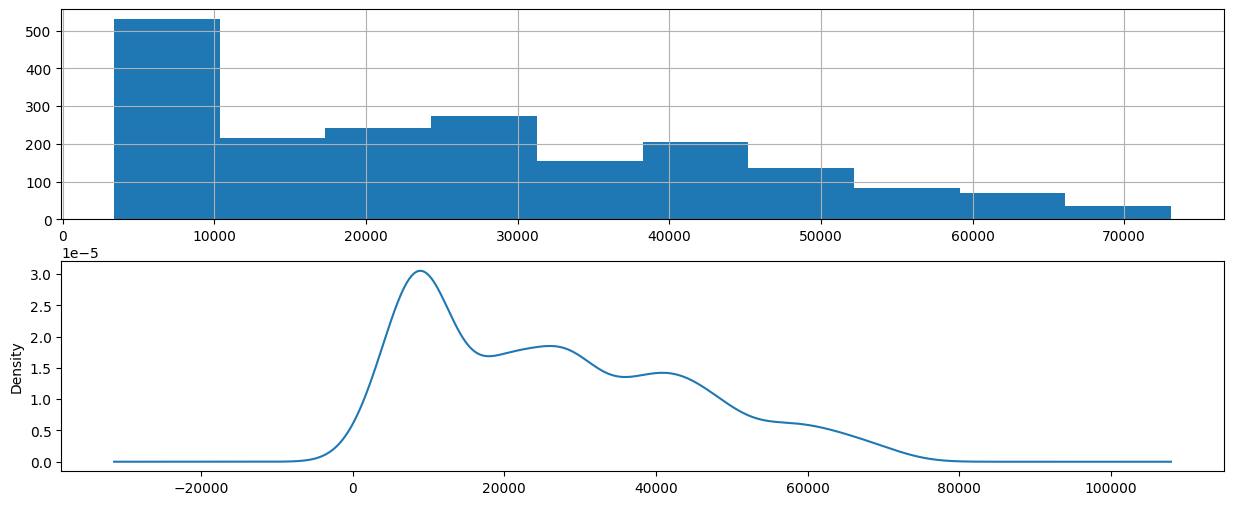

In [7]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

In [8]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [9]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [10]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [16]:
print(train)

             Close
0      3843.520020
1      3943.409424
2      3836.741211
3      3857.717529
4      3845.194580
...            ...
1909  67234.171880
1910  69958.812500
1911  69987.835940
1912  69455.343750
1913  70744.953130

[1914 rows x 1 columns]


In [17]:
print(test)

            Close
1914  69892.82813
1915  69645.30469
1916  71333.64844
1917  69702.14844
1918  65446.97266
1919  65980.81250
1920  68508.84375
1921  67837.64063
1922  68896.10938
1923  69362.55469
1924  71631.35938
1925  69139.01563
1926  70587.88281
1927  70060.60938
1928  67195.86719
1929  63821.47266
1930  65738.72656
1931  63426.21094
1932  63811.86328
1933  61276.69141
1934  63512.75391
1935  63843.57031
1936  64994.44141
1937  64926.64453
1938  66837.67969
1939  66407.27344
1940  64276.89844
1941  64481.70703
1942  63755.32031
1943  62694.92188


In [11]:

stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32183.439, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32184.803, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32181.583, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32181.775, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32184.778, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=32183.171, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32184.131, Time=1.81 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=32181.775, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.620 seconds


In [26]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1914
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -16087.791
Date:                Wed, 12 Jun 2024   AIC                          32181.583
Time:                        09:06:08   BIC                          32198.252
Sample:                             0   HQIC                         32187.717
                               - 1914                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.7340     24.981      1.470      0.141     -12.228      85.696
ar.L1         -0.0522      0.014     -3.669      0.000      -0.080      -0.024
sigma2      1.181e+06    1.7e+04     69.292      0.000    1.15e+06    1.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5199.16
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.98   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [21]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(1944, 1974)
df_conf = df_conf.set_index("new_index")

In [22]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 30449371.13828029
MSE is : 4663.5722067939
RMSE is : 5518.094883044355
MAPE is : 7.1991009703395035
R2 is : -2.7689193184294414



In [23]:
forecast["new_index"] = range(1944, 1974)
forecast = forecast.set_index("new_index")

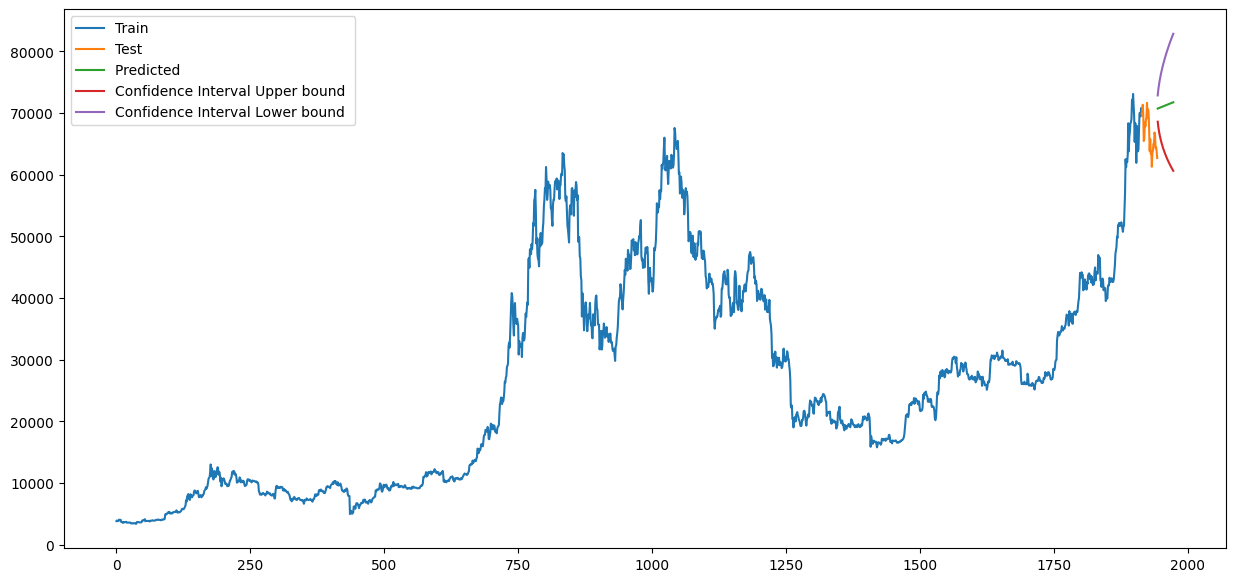

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

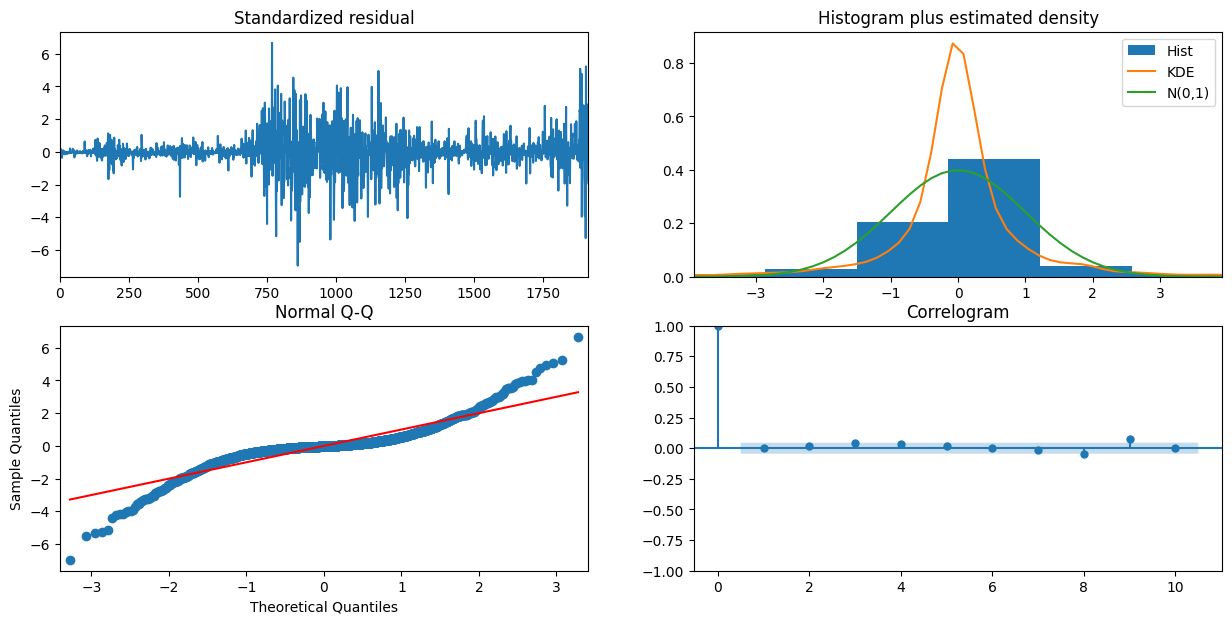

In [25]:
stepwise_model.plot_diagnostics();